##  Data Anlysis on COVID-19 in India


## Table of Contents


    
1. [Exploring Datasets with *pandas*](#0)<br>
2. [Downloading and Prepping Data *pandas*](#1) <br>
3. [Total States affected by Covid-19 *pandas*](#3)<br>
    * [Top 5  states affected by COVID-19 *pandas*](#4) <br>
    * [Least affected states](#5) <br>
    * [Active cases in India](#6)<br>
    * [Top 5 active states](#7) <br>
    * [Have less impact by Covid-19](#8) <br>
    * [Cured patients from Covid-19](#9) <br>
    * [Fast recovering states](#10) <br>
    * [Deaths by Covid-19](#11) <br>
    * [High death impact states](#12) <br>
    * [No death impact states](#13) <br>
4. [Scatter Plot Against Total](#14)<br>
5. [Linear regression between Active and Total](#15)<br>
6. [Area Plot](#16)<br>
7. [Geo-Sapatial Visualization of COVID-19 IN INDIA](#20)<br>

# Exploring Datasets with **pandas** <a id='0'></a>

https://www.mohfw.gov.in/

*The country reported its first three cases in Kerala, all of whom were students who had returned from Wuhan, China. The transmission escalated in the month of March, after several cases were reported all over the country, most of which were linked to people with a travel history to affected countries.
On 10 March, the total cases reached 50. On 12 March, a 76-year-old man who had returned from Saudi Arabia became the first victim of the virus in the country. The total cases reached 100 on 15 March and 250 on 20 March.*

**The data set consists of number of corona virus cases in India**

# Downloading and Prepping Data <a id='1'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import folium

In [2]:
covid = pd.read_html('https://www.mohfw.gov.in/')
df = covid[0]
df

,S. No.,Name of State / UT,Total Confirmed cases (Including 111 foreign Nationals),Cured/Discharged/Migrated,Death
0,1,Andaman and Nicobar Islands,33,16,0
1,2,Andhra Pradesh,1463,403,33
2,3,Arunachal Pradesh,1,1,0
3,4,Assam,42,29,1
4,5,Bihar,426,82,2
5,6,Chandigarh,56,17,0
6,7,Chhattisgarh,40,36,0
7,8,Delhi,3515,1094,59
8,9,Goa,7,7,0
9,10,Gujarat,4395,613,214


In [3]:
df = df.rename(columns={'Name of State / UT':'State/UT',
                   'Total Confirmed cases (Including 111 foreign Nationals)':'Total',
                   'Cured/Discharged/Migrated':'Cured'})
df = df.drop('S. No.',axis=1)
df = df[:-4]
df.set_index('State/UT',inplace=True)
df = df[['Total','Cured','Death']].astype(int)
df['Active'] = df['Total']-(df['Cured']+df['Death'])
df = df[['Active','Cured','Death','Total']]

In [4]:
df.shape
print('Dimensions of Data Frame',df.shape)

Dimensions of Data Frame (32, 4)


In [5]:
df.head()

,Active,Cured,Death,Total
State/UT,,,,
Andaman and Nicobar Islands,17,16,0,33
Andhra Pradesh,1027,403,33,1463
Arunachal Pradesh,0,1,0,1
Assam,12,29,1,42
Bihar,342,82,2,426


In [6]:
df.tail()

,Active,Cured,Death,Total
State/UT,,,,
Telengana,572,441,26,1039
Tripura,0,2,0,2
Uttarakhand,21,36,0,57
Uttar Pradesh,1685,555,41,2281
West Bengal,623,139,33,795


# Groupby Method for Visualization

In [7]:
total = df.groupby('State/UT')['Total'].sum()
total = total.sort_values(ascending=False).to_frame()
total

,Total
State/UT,
Maharashtra,10498
Gujarat,4395
Delhi,3515
Madhya Pradesh,2719
Rajasthan,2584
Tamil Nadu,2323
Uttar Pradesh,2281
Andhra Pradesh,1463
Telengana,1039


# Total States affected by Covid-19

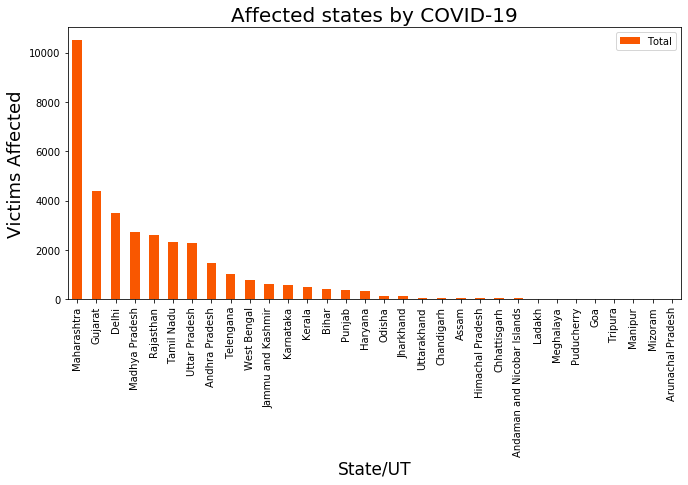

In [8]:
total.plot(kind='bar',figsize=(11,5),color='#F95700FF')
plt.title('Affected states by COVID-19',fontsize=20)
plt.ylabel('Victims Affected',fontsize=18)
plt.xlabel('State/UT',fontsize=17)
plt.show()

In [9]:
tdf = total.head()
tdf

,Total
State/UT,
Maharashtra,10498
Gujarat,4395
Delhi,3515
Madhya Pradesh,2719
Rajasthan,2584


# Top 5  states affected by COVID-19 

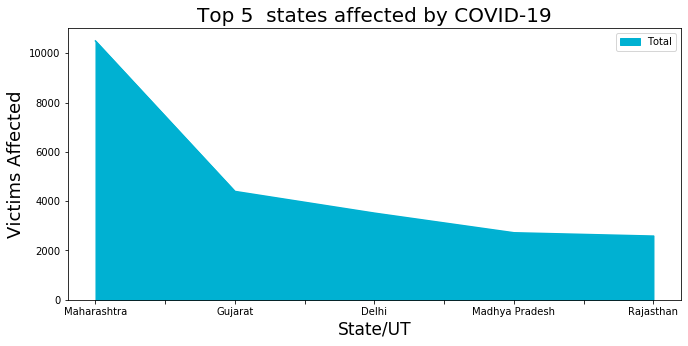

In [10]:
tdf.plot(kind='area',figsize=(11,5),color='#00B1D2FF')
plt.title('Top 5  states affected by COVID-19',fontsize=20)
plt.xlabel('State/UT',fontsize=17)
plt.ylabel('Victims Affected',fontsize=18)
plt.show()

In [11]:
ldf = total.tail()

In [12]:
ldf

,Total
State/UT,
Goa,7
Tripura,2
Manipur,2
Mizoram,1
Arunachal Pradesh,1


# Least affected states by Covid-19 <a id='5'></a>

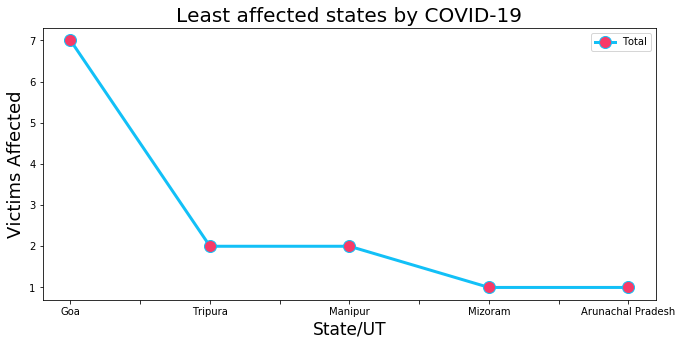

In [13]:
ldf.plot(kind='line',figsize=(11,5),
           color='#12C0F7',
           marker='o',
           markersize=12,
           markerfacecolor='#F73A68',
           linewidth=3)
plt.title('Least affected states by COVID-19',fontsize=20)
plt.xlabel('State/UT',fontsize=17)
plt.ylabel('Victims Affected',fontsize=18)
plt.show()

# Active Cases in India <a id='6'></a>

In [14]:
active = df.groupby('State/UT')['Active'].sum()

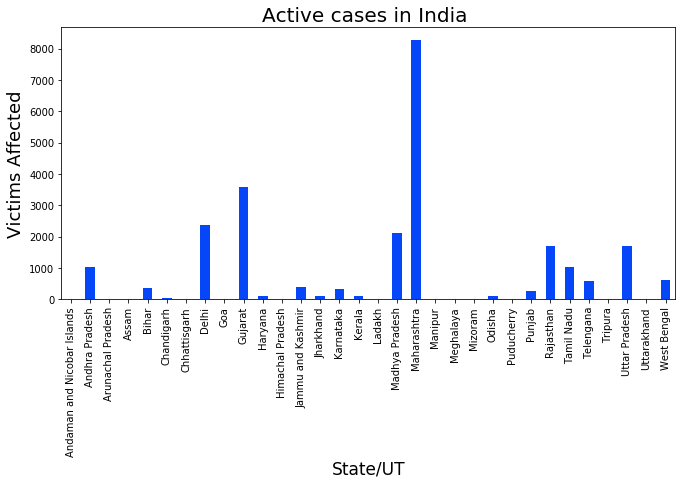

In [15]:
active.plot(kind='bar',figsize=(11,5),color='#0547F8')
plt.title('Active cases in India ',fontsize=20)
plt.xlabel('State/UT',fontsize=17)
plt.ylabel('Victims Affected',fontsize=18)
plt.show()

In [16]:
active = active.sort_values(ascending=False).to_frame()
adf = active.head()
aldf = active.tail()

# Top 5 states are in Active <a id='7'></a>

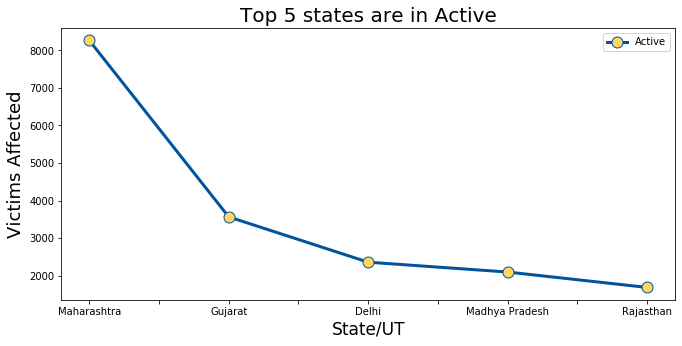

In [17]:
adf.plot(kind='line',figsize=(11,5),
           color='#00539CFF',
           marker='o',
           markersize=11,
           markerfacecolor='#FFD662FF',
           linewidth=3)
plt.title('Top 5 states are in Active',fontsize=20)
plt.xlabel('State/UT',fontsize=17)
plt.ylabel('Victims Affected',fontsize=18)
plt.show()

# Have less impact by Covid-19 <a id='8'></a>

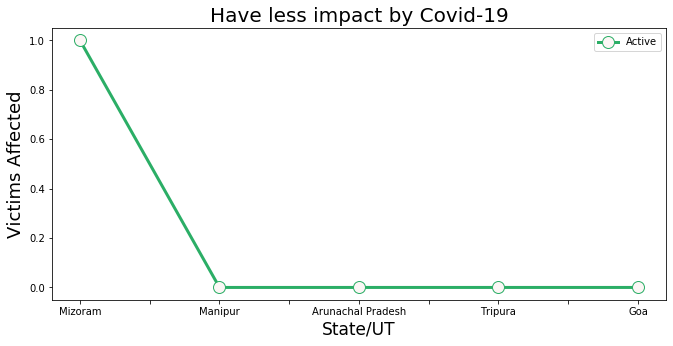

In [18]:
aldf.plot(kind='line',figsize=(11,5),
           color='#2BAE66FF',
           marker='o',
           markersize=12,
           markerfacecolor='#FCF6F5FF',
           linewidth=3)
plt.title('Have a low impact by Covid-19',fontsize=20)
plt.xlabel('State/UT',fontsize=17)
plt.ylabel('Victims Affected',fontsize=18)
plt.show()

# Cured patients from Covid-19 <a id='9'></a>

In [19]:
recovery = df.groupby('State/UT')['Cured'].sum()

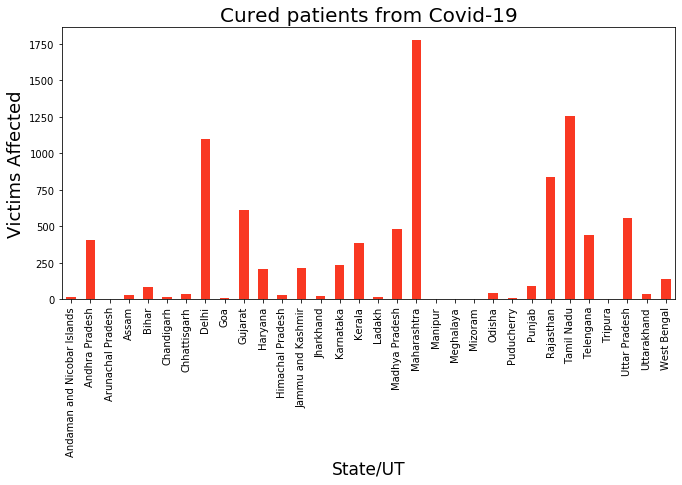

In [20]:
recovery.plot(kind='bar',figsize=(11,5),color='#F93822FF')
plt.title('Cured patients from Covid-19',fontsize=20)
plt.xlabel('State/UT',fontsize=17)
plt.ylabel('Victims Affected',fontsize=18)
plt.show()

In [21]:
recovery = recovery.sort_values(ascending=False).to_frame()
fdf = recovery.head()

In [22]:
fdf

,Cured
State/UT,
Maharashtra,1773
Tamil Nadu,1258
Delhi,1094
Rajasthan,836
Gujarat,613


# Fastest recovering states 

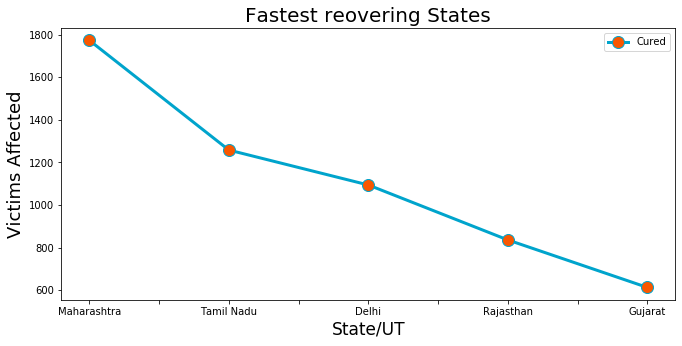

In [23]:
fdf.plot(kind='line',figsize=(11,5),
           color='#00A4CCFF',
           marker='o',
           markersize=12,
           markerfacecolor='#F95700FF',
           linewidth=3)
plt.title('Fastest reovering States',fontsize=20)
plt.xlabel('State/UT',fontsize=17)
plt.ylabel('Victims Affected',fontsize=18)
plt.show()

# Deaths by Covid-19 <a id='11'></a> 

In [24]:
death = df.groupby('State/UT')['Death'].sum()
death = death.sort_values(ascending=False).to_frame()

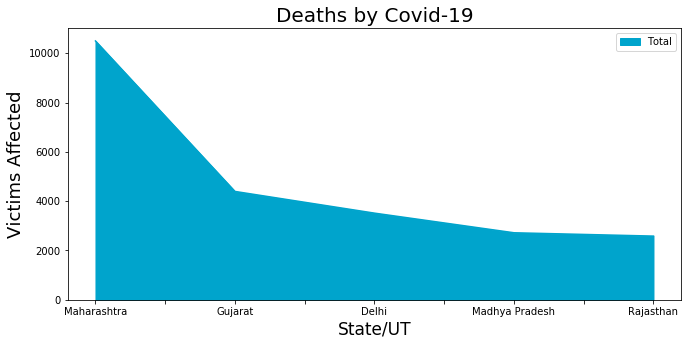

In [25]:
tdf.plot(kind='area',figsize=(11,5),color='#00A4CCFF')
plt.title('Deaths by Covid-19',fontsize=20)
plt.xlabel('State/UT',fontsize=17)
plt.ylabel('Victims Affected',fontsize=18)
plt.show()

In [26]:
tddf = death.head()

In [27]:
tddf


,Death
State/UT,
Maharashtra,459
Gujarat,214
Madhya Pradesh,137
Delhi,59
Rajasthan,58


# High  Death Impact States <a id='12'></a>

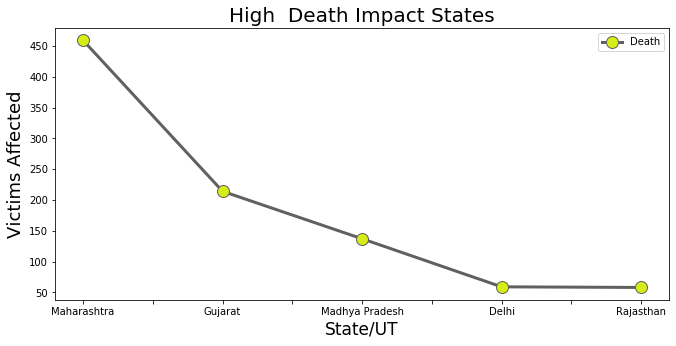

In [28]:
tddf.plot(kind='line',figsize=(11,5),
           color='#606060FF',
           marker='o',
           markersize=12,
           markerfacecolor='#D6ED17FF',
           linewidth=3)
plt.title('High  Death Impact States',fontsize=20)
plt.xlabel('State/UT',fontsize=17)
plt.ylabel('Victims Affected',fontsize=18)
plt.show()

In [29]:
lddf = death.tail()

# No Death Imapct States <a id='13'></a>

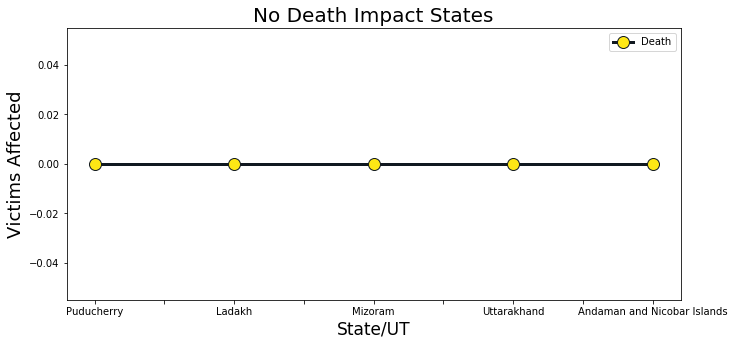

In [30]:
lddf.plot(kind='line',figsize=(11,5),
           color='#101820FF',
           marker='o',
           markersize=12,
           markerfacecolor='#FEE715FF',
           linewidth=3)
plt.title('No Death Impact States',fontsize=20)
plt.xlabel('State/UT',fontsize=17)
plt.ylabel('Victims Affected',fontsize=18)
plt.show()

# Scatter Plot Against Total <a id='14'></a>

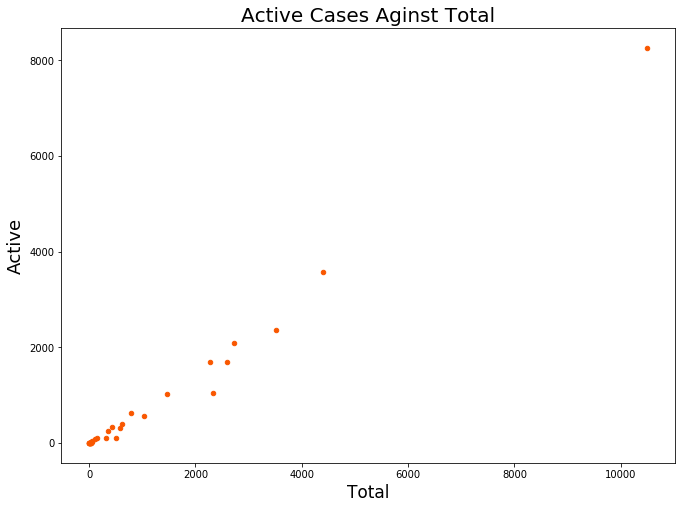

In [31]:
df.plot(kind='scatter', x='Total',y='Active',figsize=(11,8),color='#F95700FF')
plt.title('Active Cases Aginst Total',fontsize=20)
plt.xlabel('Total',fontsize=17)
plt.ylabel('Active',fontsize=18)
plt.show()

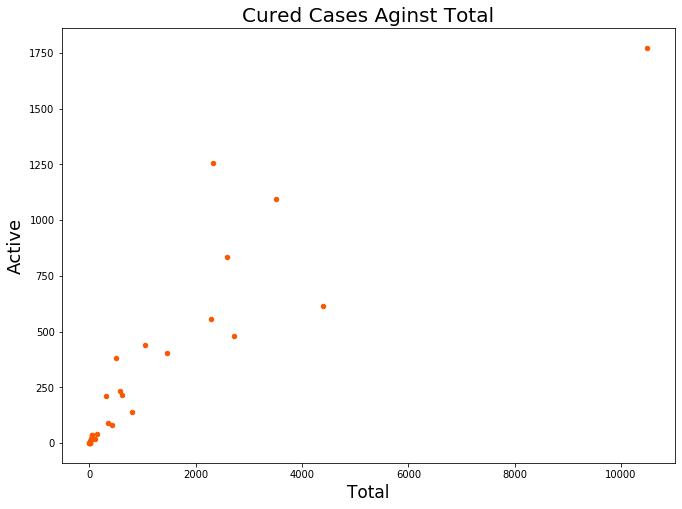

In [32]:
df.plot(kind='scatter', x='Total',y='Cured',figsize=(11,8),color='#F95700FF')
plt.title('Cured Cases Aginst Total',fontsize=20)
plt.xlabel('Total',fontsize=17)
plt.ylabel('Active',fontsize=18)
plt.show()

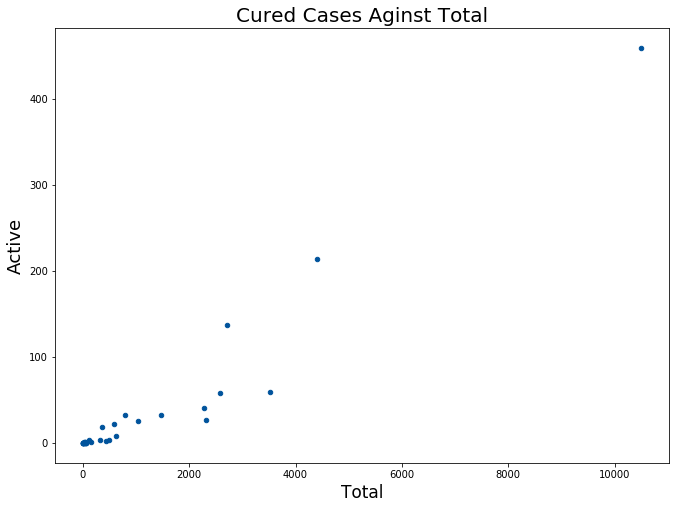

In [33]:
df.plot(kind='scatter', x='Total',y='Death',figsize=(11,8),color='#00539CFF',marker='o')
plt.title('Cured Cases Aginst Total',fontsize=20)
plt.xlabel('Total',fontsize=17)
plt.ylabel('Active',fontsize=18)
plt.show()

# Regression between Active and Total <a id='15'></a>

In [34]:
import seaborn as sns

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Regression between Active and Total')

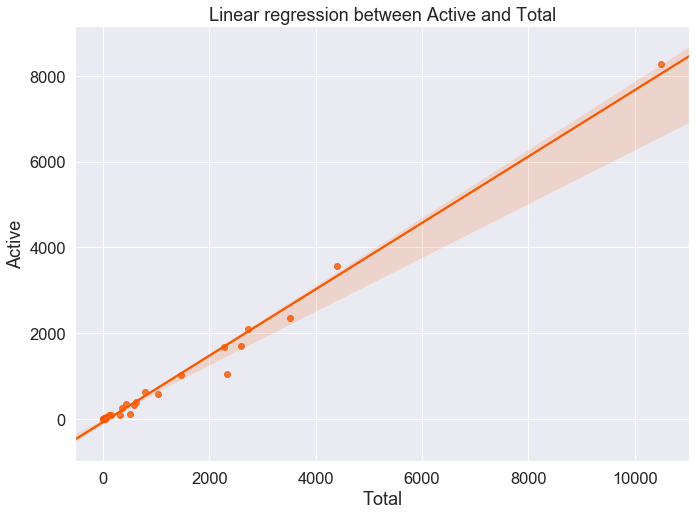

In [35]:
plt.figure(figsize=(11,8))

sns.set(font_scale=1.5)
ax = sns.regplot(x='Total',y='Active',data=df,color='#F95700FF')
ax.set(xlabel='Total', ylabel='Active')
ax.set_title('Regression Plot between Active and Total')

# Area Plot <a id='16'></a>

In [36]:
compa = df.loc[['Telengana','Maharashtra','Tamil Nadu','Gujarat']]

In [37]:
compa = pd.DataFrame(compa)

In [38]:
compa

,Active,Cured,Death,Total
State/UT,,,,
Telengana,572,441,26,1039
Maharashtra,8266,1773,459,10498
Tamil Nadu,1038,1258,27,2323
Gujarat,3568,613,214,4395


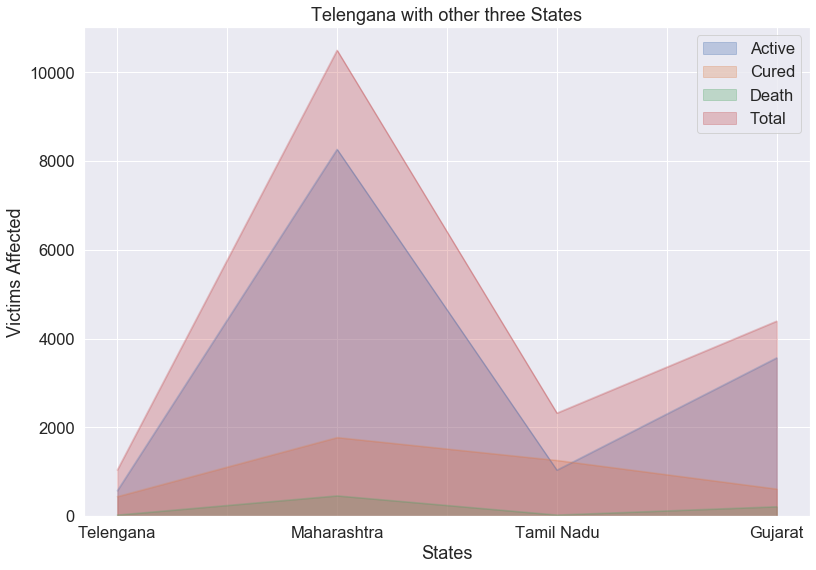

In [39]:
compa.plot(kind='area', 
             alpha=0.3, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(13, 9),
            )

plt.title('Telengana with other three States')
plt.ylabel('Victims Affected')
plt.xlabel('States')

plt.show()

# Geo-Sapatial Visualization of COVID-19 IN INDIA

In [40]:
pwd

'/Users/nagapurnithinreddy/Downloads/COVID'

In [41]:
cd

/Users/nagapurnithinreddy


In [42]:
idc = open('Indian Coordinates.csv')

In [43]:
idf = pd.read_csv(idc)

In [44]:
idf

,Name of State / UT,Latitude,Longitude
0,Andaman and Nicobar Islands,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Delhi,28.669993,77.230004
8,Goa,15.491997,73.818001
9,Gujarat,22.258700,71.192400


In [45]:
idf = idf.rename(columns={'Name of State / UT':'State/UT'})

In [46]:
idf.set_index('State/UT',inplace=True)

In [47]:
idf.head()

,Latitude,Longitude
State/UT,,
Andaman and Nicobar Islands,11.667026,92.735983
Andhra Pradesh,14.750429,78.570026
Arunachal Pradesh,27.100399,93.616601
Assam,26.749981,94.216667
Bihar,25.785414,87.479973


In [48]:
mdf = pd.merge(idf,df,on="State/UT")

In [49]:
mdf

,Latitude,Longitude,Active,Cured,Death,Total
State/UT,,,,,,
Andaman and Nicobar Islands,11.667026,92.735983,17,16,0,33
Andhra Pradesh,14.750429,78.570026,1027,403,33,1463
Arunachal Pradesh,27.100399,93.616601,0,1,0,1
Assam,26.749981,94.216667,12,29,1,42
Bihar,25.785414,87.479973,342,82,2,426
Chandigarh,30.719997,76.780006,39,17,0,56
Chhattisgarh,22.090420,82.159987,4,36,0,40
Delhi,28.669993,77.230004,2362,1094,59,3515
Goa,15.491997,73.818001,0,7,0,7


In [50]:
tdf = pd.DataFrame(mdf[['Active','Cured','Death','Total']])
tdf = tdf[['Active','Cured','Death','Total']].astype(str)
tdf.head()

,Active,Cured,Death,Total
State/UT,,,,
Andaman and Nicobar Islands,17,16,0,33
Andhra Pradesh,1027,403,33,1463
Arunachal Pradesh,0,1,0,1
Assam,12,29,1,42
Bihar,342,82,2,426


# Geo-Sapatial Visualization of COVID-19 IN INDIA <a id='20'></a>

In [75]:
amap = folium.Map(location=[20.5937,78.9629],zoom_start=4.7)
for lat,lng,a,c,d,t in zip(mdf['Latitude'],mdf['Longitude'],tdf['Active'],tdf['Cured'],tdf['Death'],tdf['Total']):
    label = 'Active :{}, Cured :{}, Death:{}, Total:{}'.format(a,c,d,t)
    label = folium.Popup(label,parse_html=True)
    folium.CircleMarker([lat,lng],
                        radius=6,
                        popup = label,
                        color='blue',
                        fill=True,
                        fill_color='#3186cc',
                        fill_opacity=0.5).add_to(amap)

In [76]:
amap

![Screenshot 2020-05-01 at 10 00 17 PM](https://user-images.githubusercontent.com/32237416/80828540-139bf580-8c03-11ea-9ec7-02b9beff46be.png)